<b>Getting data from the USPTO office into a local mysql server and loading it into a dataframe

In [1]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#import mysql.connector as sql

In [2]:
#db_connection = sql.connect(host='127.0.0.1', database='test', user='root', password='test', port='3307')

In [3]:
#db_cursor = db_connection.cursor()

In [4]:
#df1 = pd.read_sql("select * from application where date between '2010-01-01' AND '2016-07-14'", con=db_connection)
#df1.head()

In [5]:
#df2 = pd.read_sql('SELECT * FROM claim limit 100', con=db_connection)
#df2.head()
df1 = pd.read_csv(r"application_updated_data_2010_onwrds.csv")
df1.head()

,Unnamed: 0,id,type,number,country,date,abstract,title,granted,num_claims,filename,number_updated
0,0,2010/20100000001,utility,20100000001,US,2010-01-07,"An improved uniform for military, police, and ...",Ballistic combat uniform,1,23,ipa100107.xml,11031145
1,1,2010/20100000002,utility,20100000002,US,2010-01-07,A personal radiation protection garment that s...,System and Method for Implementing a Suspended...,1,37,ipa100107.xml,12557703
2,2,2010/20100000003,utility,20100000003,US,2010-01-07,An upper garment with a travel pocket includes...,UPPER GARMENT WITH POCKETS,0,20,ipa100107.xml,12435742
3,3,2010/20100000004,utility,20100000004,US,2010-01-07,Inner wear for wearing beneath a jacket is pro...,ARTICLE OF CLOTHING,0,22,ipa100107.xml,12168649
4,4,2010/20100000005,utility,20100000005,US,2010-01-07,A sports jersey/shirt suited for athletic part...,Sports Compression Shirt,0,8,ipa100107.xml,12167023


In [6]:
#df2.iloc[95,2]
df1.shape

(2292690, 12)

In [7]:
df1['id'].nunique()

2292690

In [8]:
#df3 = pd.read_csv(r"C:\Users\PRASEHGAL\Documents\Datasets\Patent\patent.tsv\patent.tsv",sep='\t')
#df3.head()

In [9]:
df1.id.str.split("/",expand=True)

,0,1
0,2010,20100000001
1,2010,20100000002
2,2010,20100000003
3,2010,20100000004
4,2010,20100000005
...,...,...
2292685,2016,20160205857
2292686,2016,20160205858
2292687,2016,20160205859
2292688,2016,20160205860


In [10]:
df2=pd.read_csv(r"nber.tsv",sep='\t')
df2.head()

,uuid,patent_id,category_id,subcategory_id
0,000114qfli99qqd9fsbxichy1,6243839,2,22
1,0001jsdl1xi7z84rzx9iwvdlh,4646100,2,21
2,0001qpsb0yts8daudtuf3mbm8,7712627,6,68
3,0001uc68swzzsbefc8eqhc7rg,5647223,6,69
4,0001y577lvjg6hwl6e36f46fs,5110393,1,19


<b>Check which patents are granted

In [11]:
#df_app= pd.read_csv(r"application.tsv",delimiter="\t")
#df_app.head()

In [12]:
#df6 = pd.merge(df1, df_app, how='inner', left_on=['number'], right_on=['number'])
#df6.head()

In [13]:
#df1['date_y'].nunique()

<b>USPC categorization and merging it with the application data

In [14]:
df3=pd.read_csv(r"uspc_current.csv")
df3.head()

,Unnamed: 0,uuid,application_id,mainclass_id,subclass_id,sequence
0,0,00004fd64hcrauax2x1xqugs3,2004/20040158292,607,607/9,0
1,1,0000pfe9e7il29c6cg968pvht,2007/20070033961,222,222/146.6,2
2,2,0000zf0lvqe5hotzn77bl83b1,2007/20070143089,358,358/501,2
3,3,000126u70sat4yq9qo96vw1p8,2015/20150194446,257,257/72,0
4,4,00014oqcjl1qb3y3lgpuxtewi,2008/20080237770,257,257/E27.146,1


In [15]:
df3['application_id'].nunique()

4573460

In [16]:
df3.shape

(9813826, 6)

In [17]:
df4 = pd.merge(df1,df3, how="left", left_on="id",right_on="application_id" ,suffixes=('_app', '_uspc'))
df4.head()

,Unnamed: 0_app,id,type,number,country,date,abstract,title,granted,num_claims,filename,number_updated,Unnamed: 0_uspc,uuid,application_id,mainclass_id,subclass_id,sequence
0,0,2010/20100000001,utility,20100000001,US,2010-01-07,"An improved uniform for military, police, and ...",Ballistic combat uniform,1,23,ipa100107.xml,11031145,1376099.0,51mr4glo50unvxy2whyitrw47,2010/20100000001,2,2/227,2.0
1,0,2010/20100000001,utility,20100000001,US,2010-01-07,"An improved uniform for military, police, and ...",Ballistic combat uniform,1,23,ipa100107.xml,11031145,4513953.0,gk1fo0ugxo97vedg3c4uu2uo7,2010/20100000001,2,2/115,1.0
2,0,2010/20100000001,utility,20100000001,US,2010-01-07,"An improved uniform for military, police, and ...",Ballistic combat uniform,1,23,ipa100107.xml,11031145,5031869.0,ige06e9wpec8lukjcmjieftxm,2010/20100000001,2,2/2.5,0.0
3,0,2010/20100000001,utility,20100000001,US,2010-01-07,"An improved uniform for military, police, and ...",Ballistic combat uniform,1,23,ipa100107.xml,11031145,9470722.0,yqp1bdx7i5sv14sijm8ct4ka7,2010/20100000001,2,2/247,3.0
4,1,2010/20100000002,utility,20100000002,US,2010-01-07,A personal radiation protection garment that s...,System and Method for Implementing a Suspended...,1,37,ipa100107.xml,12557703,9476725.0,yrihd3zfbjctqumtzgzthh9ax,2010/20100000002,2,2/9,0.0


In [18]:
#df4['mainclass_id'].nunique()
#df4["mainclass_id"].isna().sum()
df4["mainclass_id"].unique()

array(['2', '4', '29', '5', '8', '68', '546', '534', '524', '156', '435',
       '544', '106', '15', '119', '401', '280', '16', '188', '24', '411',
       '407', '429', '264', '427', '30', '83', '33', '73', '34', '510',
       '454', '432', '241', '36', '12', '37', '38', '40', '248', '42',
       '81', '7', '43', '242', '44', '525', '366', '47', '165', '48',
       '502', '49', '52', '51', '428', '108', '232', '136', '404', '144',
       '249', '53', '55', '56', '57', '19', '415', '60', '418', '508',
       '123', '166', '290', '62', '417', '239', '220', '63', '65', '66',
       '70', '71', '159', '72', '138', '100', '74', '700', '548', '702',
       '356', '324', '422', '501', '901', '219', '279', '433', '382',
       '408', '173', '409', '228', '84', '89', '92', '267', '95', '96',
       '99', '101', '102', '244', '104', '210', '423', '110', '111',
       '112', '114', '504', '440', '116', '117', '257', '118', '122',
       '184', '464', '310', '372', '359', '701', '180', '124', '125

In [19]:
df4.shape

(4685302, 18)

In [20]:
df_apparel=df4[df4['mainclass_id'].isin(['2','223','D02','D2'])]
df_apparel.head()
#['117','14','140','137','138','141','142','144','147','148','134','15','156','16',
#'166','173','134','132','182','187','198','217','231','232','239','245','285','29','290']

,Unnamed: 0_app,id,type,number,country,date,abstract,title,granted,num_claims,filename,number_updated,Unnamed: 0_uspc,uuid,application_id,mainclass_id,subclass_id,sequence
0,0,2010/20100000001,utility,20100000001,US,2010-01-07,"An improved uniform for military, police, and ...",Ballistic combat uniform,1,23,ipa100107.xml,11031145,1376099.0,51mr4glo50unvxy2whyitrw47,2010/20100000001,2,2/227,2.0
1,0,2010/20100000001,utility,20100000001,US,2010-01-07,"An improved uniform for military, police, and ...",Ballistic combat uniform,1,23,ipa100107.xml,11031145,4513953.0,gk1fo0ugxo97vedg3c4uu2uo7,2010/20100000001,2,2/115,1.0
2,0,2010/20100000001,utility,20100000001,US,2010-01-07,"An improved uniform for military, police, and ...",Ballistic combat uniform,1,23,ipa100107.xml,11031145,5031869.0,ige06e9wpec8lukjcmjieftxm,2010/20100000001,2,2/2.5,0.0
3,0,2010/20100000001,utility,20100000001,US,2010-01-07,"An improved uniform for military, police, and ...",Ballistic combat uniform,1,23,ipa100107.xml,11031145,9470722.0,yqp1bdx7i5sv14sijm8ct4ka7,2010/20100000001,2,2/247,3.0
4,1,2010/20100000002,utility,20100000002,US,2010-01-07,A personal radiation protection garment that s...,System and Method for Implementing a Suspended...,1,37,ipa100107.xml,12557703,9476725.0,yrihd3zfbjctqumtzgzthh9ax,2010/20100000002,2,2/9,0.0


In [21]:
df_apparel.shape

(10700, 18)

In [22]:
df_apparel['id'].nunique()

7465

In [23]:
df_apparel['granted'].unique()

array([1, 0])

In [24]:
df5 = pd.DataFrame(df_apparel.groupby(['id', 'date','abstract','title','num_claims','filename','mainclass_id']).subclass_id.apply(list))
df5.head()

,,,,,,,subclass_id
id,date,abstract,title,num_claims,filename,mainclass_id,
2010/20100000001,2010-01-07,"An improved uniform for military, police, and security personnel that when worn with ballistic vests, offer the wearer increased protection, performance and survivability from low and high velocity projectiles in a combat or tactical environment.",Ballistic combat uniform,23,ipa100107.xml,2,"[2/227, 2/115, 2/2.5, 2/247]"
2010/20100000002,2010-01-07,"A personal radiation protection garment that substantially contours to an operator's body is suspended from a suspension means. The garment is operable to protect the operator from radiation. The suspension means is operable to apply constant force. The suspension means allows operator wearing protective radiation garment to move freely in the X, Y, and Z spatial planes simultaneously, such that the protective radiation garment is substantially weightless to operator. A radiation protection face shield and flap can also be suspended from suspension means, such that face shield and flap are substantially weightless to operator. The suspension means can be mounted to a ceiling.",System and Method for Implementing a Suspended Personal Radiation Protection System,37,ipa100107.xml,2,[2/9]
2010/20100000003,2010-01-07,"An upper garment with a travel pocket includes a panel covering a part of a wearer's body and a first pocket positioned on the panel generally below a waist line of the wearer. The first pocket is accessible to the wearer from a first top side of the first pocket, wherein said first top side is substantially along the waist line of the wearer. A second pocket is positioned between the first pocket and the panel, and is accessible to the wearer from a first top side of said second pocket. A first fastener mechanism reversibly closes the first top side of the first pocket with respect to the panel.",UPPER GARMENT WITH POCKETS,20,ipa100107.xml,2,"[2/251, 2/252, 2/69]"
2010/20100000004,2010-01-07,"Inner wear for wearing beneath a jacket is provide, including a water permeable top suitable for wearing indoors in heated surroundings; and a waterproof, water repellent or water resistant band, the band attached to a bottom portion of the top below said jacket, and sized to cover the torso of a wearer. The band may be detachable from the top, and may be attached to the top via a hook and loop combination, buttons, snaps, or a zipper.",ARTICLE OF CLOTHING,22,ipa100107.xml,2,"[2/115, 2/243.1, 2/108]"
2010/20100000005,2010-01-07,"A sports jersey/shirt suited for athletic participation, and particularly suitable for playing football, rugby, and the like where carrying a leather ball is involved. The shirt has several features that enhance the wearer's ability to firmly carry the ball with minimal slippage while improving the comfort of the shirt. The jersey includes a tactified surface on the outside surface of the sleeve where the ball contacts the arm as the player carries the ball in a tucked position. The surface is tacky to the touch to improve the connection between arm, shirt, and ball, thereby promoting enhanced ball security.",Sports Compression Shirt,8,ipa100107.xml,2,"[2/115, 2/125, 2/122]"


In [25]:
df5 = df5.add_suffix('_List').reset_index()
df5.head()

,id,date,abstract,title,num_claims,filename,mainclass_id,subclass_id_List
0,2010/20100000001,2010-01-07,"An improved uniform for military, police, and ...",Ballistic combat uniform,23,ipa100107.xml,2,"[2/227, 2/115, 2/2.5, 2/247]"
1,2010/20100000002,2010-01-07,A personal radiation protection garment that s...,System and Method for Implementing a Suspended...,37,ipa100107.xml,2,[2/9]
2,2010/20100000003,2010-01-07,An upper garment with a travel pocket includes...,UPPER GARMENT WITH POCKETS,20,ipa100107.xml,2,"[2/251, 2/252, 2/69]"
3,2010/20100000004,2010-01-07,Inner wear for wearing beneath a jacket is pro...,ARTICLE OF CLOTHING,22,ipa100107.xml,2,"[2/115, 2/243.1, 2/108]"
4,2010/20100000005,2010-01-07,A sports jersey/shirt suited for athletic part...,Sports Compression Shirt,8,ipa100107.xml,2,"[2/115, 2/125, 2/122]"


In [26]:
df5.shape

(7476, 8)

<b>Scikit learn tf-idf

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
!pip install nltk

In [29]:
!pip install textblob

In [30]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [31]:
df5.abstract = df5.abstract.str.replace('\d+', '')
df5.abstract = df5.abstract.str.replace('-','')
df5.head()

,id,date,abstract,title,num_claims,filename,mainclass_id,subclass_id_List
0,2010/20100000001,2010-01-07,"An improved uniform for military, police, and ...",Ballistic combat uniform,23,ipa100107.xml,2,"[2/227, 2/115, 2/2.5, 2/247]"
1,2010/20100000002,2010-01-07,A personal radiation protection garment that s...,System and Method for Implementing a Suspended...,37,ipa100107.xml,2,[2/9]
2,2010/20100000003,2010-01-07,An upper garment with a travel pocket includes...,UPPER GARMENT WITH POCKETS,20,ipa100107.xml,2,"[2/251, 2/252, 2/69]"
3,2010/20100000004,2010-01-07,Inner wear for wearing beneath a jacket is pro...,ARTICLE OF CLOTHING,22,ipa100107.xml,2,"[2/115, 2/243.1, 2/108]"
4,2010/20100000005,2010-01-07,A sports jersey/shirt suited for athletic part...,Sports Compression Shirt,8,ipa100107.xml,2,"[2/115, 2/125, 2/122]"


In [32]:
# Use NLTK's PorterStemmer
import re
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
def stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z]", " ", str_input).lower().split()
    #words = str_input.lower().split()
    #r"[^A-Za-z0-9\-]"
    words = [porter_stemmer.stem(word) for word in words]
    #print (words)
    return words
from textblob import TextBlob

# Use TextBlob
def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words


import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmitization_tokenizer(str_input):
    words = nltk.word_tokenize(str_input)
    words = [wordnet_lemmatizer.lemmatize(word) for word in words]
    return words
#lemmitization- standardize it. 
#Vaish's 
#ps = PorterStemmer() 
#stemmed=[]   
#for w in words: 
#    stemmed.append(ps.stem(w))

In [33]:
v = TfidfVectorizer(stop_words='english',lowercase=True, token_pattern=r'(?u)\b[A-Za-z]+\b', tokenizer=stemming_tokenizer)
x = v.fit_transform(df5['abstract'])
#,token_pattern=u'(?u)\b\w*[a-zA-Z]\w*\b'
#token_pattern=r'(?u)\b[A-Za-z]+\b'
#, tokenizer=textblob_tokenizertokenizer=stemming_tokenizer,

/opt/conda/envs/fastai/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.

In [34]:
matrix = pd.DataFrame.sparse.from_spmatrix(x,columns= v.get_feature_names())

In [35]:
matrix.columns.tolist()

['aami',
 'aaron',
 'ab',
 'abandon',
 'abbrevi',
 'abc',
 'abdomen',
 'abdomencov',
 'abdomin',
 'abdomini',
 'abduct',
 'abductor',
 'aberr',
 'abil',
 'abl',
 'ablebodi',
 'abnorm',
 'abov',
 'abovedescrib',
 'abovement',
 'abrad',
 'abras',
 'abrasionresist',
 'abrupt',
 'absenc',
 'absolut',
 'absorb',
 'absorbencyenhanc',
 'absorpt',
 'abstract',
 'abund',
 'abus',
 'abut',
 'academ',
 'acceler',
 'accelerationratesensit',
 'acceleromet',
 'accent',
 'accentu',
 'accept',
 'access',
 'accessor',
 'accessori',
 'accessoryretain',
 'accid',
 'accident',
 'accliv',
 'accommod',
 'accompani',
 'accomplish',
 'accord',
 'accordingli',
 'accordion',
 'account',
 'accoutr',
 'accultur',
 'accumul',
 'accur',
 'accuraci',
 'acet',
 'acetabular',
 'aceton',
 'acetonitril',
 'acetylenediol',
 'ach',
 'achiev',
 'achil',
 'achromat',
 'acid',
 'acidosi',
 'acknowledg',
 'acn',
 'acoust',
 'acquir',
 'acrobat',
 'acromioclavicular',
 'acryl',
 'acrylonitril',
 'acrylonitrilebutadien',
 'act'

In [36]:
#pairwise_similarity = x * x.T

In [37]:
#pairwise_similarity.toarray()

In [38]:
import numpy as np
feature_array = np.array(v.get_feature_names())
#feature_array = np.array(matrix.columns)
tfidf_sorting = np.argsort(x.toarray()).flatten()[::-1]

In [39]:
feature_array

array(['aami', 'aaron', 'ab', ..., 'zone', 'zoom', 'zshape'], dtype='<U30')

In [40]:
tfidf_sorting

array([4393, 9439, 1471, ..., 6341, 6340,    0])

In [41]:
n = 120
top_n = feature_array[tfidf_sorting][:n]

In [42]:
top_n

array(['label', 'woven', 'collar', 'shirt', 'integr', 'neck', 'panel',
       'weav', 'abl', 'elimin', 'directli', 'specif', 'util', 'thu',
       'apparel', 'item', 'easili', 'separ', 'disclos', 'remov', 'user',
       'freezabl', 'frequenc', 'format', 'french', 'freezer', 'formfit',
       'fresh', 'freestand', 'freeli', 'freeform', 'freefloat', 'freefal',
       'freedom', 'frequent', 'fossa', 'free', 'freshli', 'fresnel',
       'formal', 'friction', 'friend', 'friendli', 'frill', 'fring',
       'frog', 'frontabdominalport', 'frontal', 'frontback', 'frontend',
       'formabl', 'freshen', 'frazier', 'foul', 'fray', 'foundat',
       'fourcett', 'fourchett', 'fourcompart', 'fourcorn', 'fourfing',
       'fourinhand', 'forwardli', 'fourpart', 'fourth', 'fourway', 'fp',
       'forwardfac', 'fr', 'forward', 'fraction', 'fractur', 'fragil',
       'forth', 'fragment', 'formula', 'fragmentari', 'formul', 'frame',
       'frameedg', 'frameless', 'framework', 'frangibl', 'formmaintain',


In [43]:
type(top_n)

numpy.ndarray

In [44]:
top_n=top_n.astype('U18')

In [45]:
for c in top_n:
    if len(c) <=2:
        index = np.argwhere(top_n==c)
        np.delete(top_n,index)
top_n

array(['label', 'woven', 'collar', 'shirt', 'integr', 'neck', 'panel',
       'weav', 'abl', 'elimin', 'directli', 'specif', 'util', 'thu',
       'apparel', 'item', 'easili', 'separ', 'disclos', 'remov', 'user',
       'freezabl', 'frequenc', 'format', 'french', 'freezer', 'formfit',
       'fresh', 'freestand', 'freeli', 'freeform', 'freefloat', 'freefal',
       'freedom', 'frequent', 'fossa', 'free', 'freshli', 'fresnel',
       'formal', 'friction', 'friend', 'friendli', 'frill', 'fring',
       'frog', 'frontabdominalport', 'frontal', 'frontback', 'frontend',
       'formabl', 'freshen', 'frazier', 'foul', 'fray', 'foundat',
       'fourcett', 'fourchett', 'fourcompart', 'fourcorn', 'fourfing',
       'fourinhand', 'forwardli', 'fourpart', 'fourth', 'fourway', 'fp',
       'forwardfac', 'fr', 'forward', 'fraction', 'fractur', 'fragil',
       'forth', 'fragment', 'formula', 'fragmentari', 'formul', 'frame',
       'frameedg', 'frameless', 'framework', 'frangibl', 'formmaintain',


<b>Word CLoud

In [46]:
!pip install wordcloud

In [47]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

In [48]:
comment_words = '' 
stopwords = set(STOPWORDS) 

In [49]:
for i in top_n:
    comment_words += " ".join(i)+" "
comment_words

'l a b e l w o v e n c o l l a r s h i r t i n t e g r n e c k p a n e l w e a v a b l e l i m i n d i r e c t l i s p e c i f u t i l t h u a p p a r e l i t e m e a s i l i s e p a r d i s c l o s r e m o v u s e r f r e e z a b l f r e q u e n c f o r m a t f r e n c h f r e e z e r f o r m f i t f r e s h f r e e s t a n d f r e e l i f r e e f o r m f r e e f l o a t f r e e f a l f r e e d o m f r e q u e n t f o s s a f r e e f r e s h l i f r e s n e l f o r m a l f r i c t i o n f r i e n d f r i e n d l i f r i l l f r i n g f r o g f r o n t a b d o m i n a l p o r t f r o n t a l f r o n t b a c k f r o n t e n d f o r m a b l f r e s h e n f r a z i e r f o u l f r a y f o u n d a t f o u r c e t t f o u r c h e t t f o u r c o m p a r t f o u r c o r n f o u r f i n g f o u r i n h a n d f o r w a r d l i f o u r p a r t f o u r t h f o u r w a y f p f o r w a r d f a c f r f o r w a r d f r a c t i o n f r a c t u r f r a g i l f o r t h f r a g m e n t f o r m u l a f r

In [50]:
unique_string=(" ").join(top_n)
unique_string

'label woven collar shirt integr neck panel weav abl elimin directli specif util thu apparel item easili separ disclos remov user freezabl frequenc format french freezer formfit fresh freestand freeli freeform freefloat freefal freedom frequent fossa free freshli fresnel formal friction friend friendli frill fring frog frontabdominalport frontal frontback frontend formabl freshen frazier foul fray foundat fourcett fourchett fourcompart fourcorn fourfing fourinhand forwardli fourpart fourth fourway fp forwardfac fr forward fraction fractur fragil forth fragment formula fragmentari formul frame frameedg frameless framework frangibl formmaintain fragranc fronttoback frontfac gadget g fuzz futur futon fussi fusion fusibl fuselag fuse furthest furthermor furnitur furnish furnac fur ga gage frontopen gain garmentengag garmentcooper garmentattach garment garden gape gap gamma gamewin gameplay gamecal game galosh'

In [51]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(unique_string)

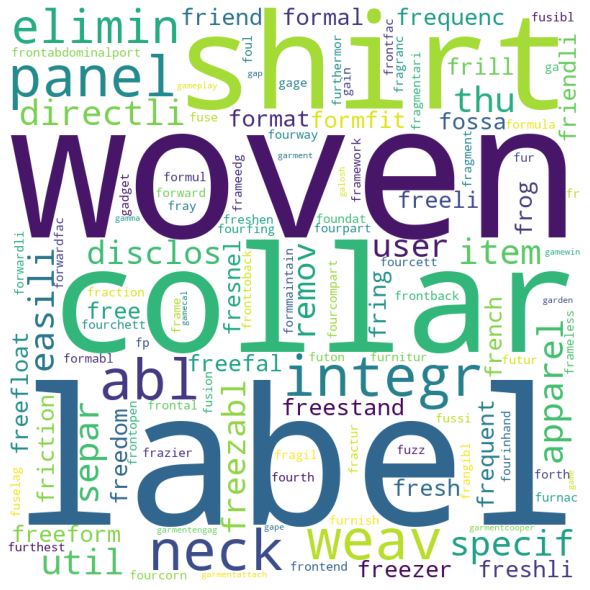

In [52]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [53]:
df5.iloc[200,2]

'This invention relates generally to a hand covering. More specifically, this invention relates to a hand covering that can be adjusted to vary the conditions inside the hand covering.'

In [54]:
df5.iloc[1129,2]

'This invention relates generally to a hand covering. More specifically, the invention relates to a hand covering that may be used with an electronic device. In particular, the hand covering includes a conductive portion that enables the wearer of the hand covering to perform various tasks, such as interacting with an electronic device, without removing the hand covering.'

<B>10 Most similar applications

In [55]:
!pip install fuzzywuzzy

In [56]:
i=200
from fuzzywuzzy import fuzz
from fuzzywuzzy import process 
choices = df5['abstract']
similar = process.extract(df5.iloc[i,2], choices, limit=11,scorer=fuzz.partial_ratio)
#similar.remove(df5.iloc[5001,2])
similar

/opt/conda/envs/fastai/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


[('This invention relates generally to a hand covering. More specifically, this invention relates to a hand covering that can be adjusted to vary the conditions inside the hand covering.',
  100,
  200),
 ('This invention relates generally to a hand covering. More specifically, the invention relates to a hand covering that may be used with an electronic device. In particular, the hand covering includes a conductive portion that enables the wearer of the hand covering to perform various tasks, such as interacting with an electronic device, without removing the hand covering.',
  80,
  1129),
 ('This invention generally relates to an upper garment. More specifically, the present invention relates to an upper garment having a pretensioned waistband.',
  65,
  1021),
 ('This invention generally relates to an upper garment. More specifically, the present invention relates to an upper garment having a pretensioned waistband.',
  65,
  4168),
 ('This invention relates to a cutresistant knit g

In [57]:
type(similar[0])

tuple

In [58]:
df_similar = pd.DataFrame(similar, columns =['Abstract', 'Score', 'Index']) 
df_similar.drop(df_similar[df_similar['Index']==i].index, inplace=True)
df_similar = df_similar[df_similar['Score']>70]
#df.drop(df[df['Age'] < 25].index, inplace = True) 
df_similar

,Abstract,Score,Index
1,This invention relates generally to a hand cov...,80,1129


In [59]:
!pip install jellyfish

In [60]:
import jellyfish
list_score=[]
df_choices = pd.DataFrame(df5['abstract'])
for x in df_choices['abstract'].to_list():
    current_score = jellyfish.jaro_winkler(x, df_choices.iloc[i,0])
    list_score.append(current_score)
df_choices['jaro_winkler'] = list_score
df_choices.drop(i, inplace=True)
df_choices.sort_values(by = ['jaro_winkler'],ascending=False).head(10)

,abstract,jaro_winkler
4168,This invention generally relates to an upper g...,0.869367
1021,This invention generally relates to an upper g...,0.869367
1124,This invention is an underwear that opens and ...,0.853217
5732,This invention pertains to an undergarment hav...,0.850799
7318,This application provides for a material confi...,0.848300
5298,This invention related to a decorative boot cl...,0.846670
1129,This invention relates generally to a hand cov...,0.840450
629,This system provides temporary heating and coo...,0.840400
6618,This invention relates to concealment devices ...,0.838489
2749,This invention details a novel band having an ...,0.836184


In [61]:
!pip install textdistance

In [62]:
list_score=[]
df_choices2 = pd.DataFrame(df5['abstract'])
for x in df_choices2['abstract'].to_list():
    current_score = jellyfish.hamming_distance(x, df_choices2.iloc[i,0])
    list_score.append(current_score)
df_choices2['hamming'] = list_score
df_choices2.drop(i, inplace=True)
df_choices2.sort_values(by = ['hamming'],ascending=True).head(10)

,abstract,hamming
1021,This invention generally relates to an upper g...,151
4168,This invention generally relates to an upper g...,151
1124,This invention is an underwear that opens and ...,154
5732,This invention pertains to an undergarment hav...,154
6618,This invention relates to concealment devices ...,155
596,This invention relates to a cutresistant knit ...,159
595,This invention relates to a cutresistant knit ...,159
4654,This invention provides a mitten comprising at...,159
583,This invention relates to a cutresistant knit ...,159
5298,This invention related to a decorative boot cl...,160


In [63]:
import math
import re
from collections import Counter

WORD = re.compile(r"\w+")
cosine_list=[]

def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator


def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)


text1 = df5.iloc[i,2]
df_choices3 = pd.DataFrame(df5['abstract'])
for x in df_choices3['abstract'].to_list():
    text2=x
    vector1 = text_to_vector(text1)
    vector2 = text_to_vector(text2)
    cosine = get_cosine(vector1, vector2)
    cosine_list.append(cosine)
#text2 = "This sentence is similar to a foo bar sentence ."
#vector1 = text_to_vector(text1)
#vector2 = text_to_vector(text2)

#cosine = get_cosine(vector1, vector2)

#print("Cosine:", cosine)
df_choices3['cosine'] = cosine_list
df_choices3.drop(i, inplace=True)
df_choices3.sort_values(by = ['cosine'],ascending=False).head(10)

,abstract,cosine
1129,This invention relates generally to a hand cov...,0.786567
1128,A protective hand covering for adhering to the...,0.582511
6556,A leg covering adapted for use with a wheelcha...,0.522455
291,A disposable sanitary hand cover includes a ha...,0.521613
4592,A hand guard for artists including a base piec...,0.514037
3563,A belt to secure a covering to a person's uppe...,0.514019
3103,A system and method for an archery device for ...,0.512683
4168,This invention generally relates to an upper g...,0.508747
1021,This invention generally relates to an upper g...,0.508747
1761,A hand covering configured to enclose a human ...,0.505403


<b> Predition of patentability

In [64]:
df1.granted.value_counts()

0    1218023
1    1074667
Name: granted, dtype: int64

In [65]:
df4.head()

,Unnamed: 0_app,id,type,number,country,date,abstract,title,granted,num_claims,filename,number_updated,Unnamed: 0_uspc,uuid,application_id,mainclass_id,subclass_id,sequence
0,0,2010/20100000001,utility,20100000001,US,2010-01-07,"An improved uniform for military, police, and ...",Ballistic combat uniform,1,23,ipa100107.xml,11031145,1376099.0,51mr4glo50unvxy2whyitrw47,2010/20100000001,2,2/227,2.0
1,0,2010/20100000001,utility,20100000001,US,2010-01-07,"An improved uniform for military, police, and ...",Ballistic combat uniform,1,23,ipa100107.xml,11031145,4513953.0,gk1fo0ugxo97vedg3c4uu2uo7,2010/20100000001,2,2/115,1.0
2,0,2010/20100000001,utility,20100000001,US,2010-01-07,"An improved uniform for military, police, and ...",Ballistic combat uniform,1,23,ipa100107.xml,11031145,5031869.0,ige06e9wpec8lukjcmjieftxm,2010/20100000001,2,2/2.5,0.0
3,0,2010/20100000001,utility,20100000001,US,2010-01-07,"An improved uniform for military, police, and ...",Ballistic combat uniform,1,23,ipa100107.xml,11031145,9470722.0,yqp1bdx7i5sv14sijm8ct4ka7,2010/20100000001,2,2/247,3.0
4,1,2010/20100000002,utility,20100000002,US,2010-01-07,A personal radiation protection garment that s...,System and Method for Implementing a Suspended...,1,37,ipa100107.xml,12557703,9476725.0,yrihd3zfbjctqumtzgzthh9ax,2010/20100000002,2,2/9,0.0


In [66]:
df7 = df4[df4['mainclass_id'].isin(['345','708','709','710','711','712','713','716','718','719'])]
#df7 = df7.sample(n = 20000)
#'345','708','709','710','711','712','713','716','718','719',
#['204','307','310','327','338','340','361','367','377','381','429',
#'439','607','708','709','710','711','712','713','718','719']

In [67]:
len(df7)

237451

In [68]:
df7 = df7[df7['abstract'].notna()]
#df7.iloc[123526,:]
len(df7)

237450

In [69]:
df8 = pd.DataFrame(df7.groupby(['id', 'date','abstract','title','granted','num_claims','filename','number_updated','mainclass_id']).subclass_id.apply(list))
df8.head()

,,,,,,,,,subclass_id
id,date,abstract,title,granted,num_claims,filename,number_updated,mainclass_id,
2010/20100001132,2010-01-07,"A display system in a flight deck comprises at least one screen (CDS, EFB) adapted for displaying several different applications and at least one cursor associated with the applications. An interaction device comprises means for activation of the cursor configurable automatically according to the application displayed. The interaction device comprises a touch-sensitive screen moreover adapted for displaying a visual representation of a control panel of a real physical system of the flight-deck. Use in particular in a flight deck of an aircraft.","Device for interaction with a display system, in particular for an avionics display system",1,9,ipa100107.xml,12492643,345,[345/173]
2010/20100001147,2010-01-07,"A stand includes a frame, a sliding member, and two torsion springs. The frame has two guide rail subassemblies. The sliding member is slidably attached to the guide rail subassemblies. A first end of each torsion spring is connected to the frame, and a second end of each torsion spring is connected to the sliding member to provide an elastic force to overcome the total weight of the sliding member and a load.",HEIGHT-ADJUSTABLE STAND,1,18,ipa100107.xml,12248624,345,[345/87]
2010/20100001403,2010-01-07,"A method of designing a semiconductor integrated circuit, includes verifying an antenna ratio of a metallic wiring connected to a first gate electrode and the first gate electrode, based on a layout information, and computing a gate area that should be added to avoid a plasma damage to the first gate electrode, based on the verifying. The method further includes modifying a layout of the semiconductor integrated circuit, based on the computing, by arranging a logic cell having a second gate electrode having the gate area or more and is in a state where the logic cell makes no contribution to a logic operation of the semiconductor integrated circuit, in a free region of the layout, and connecting the second gate electrode to the metallic wiring.",Method for designing semiconductor integrated circuit which includes metallic wiring connected to gate electrode and satisfies antenna criterion,0,14,ipa100107.xml,12458150,716,[716/119]
2010/20100001760,2010-01-07,"A programmable system-on-a-chip integrated circuit device includes a programmable logic block, at least one user non-volatile memory block, and voltage-measuring and control analog and digital circuits on a single semiconductor integrated circuit chip or a flip chip, face-to-face, or other multiple die configuration. The programmable system-on-a-chip integrated circuit with voltage-measuring, current-measuring and control circuitry performs voltage measurement and control functions and can be used to control and monitor external power supplies connected to external loads.",PROGRAMMABLE SYSTEM ON A CHIP FOR POWER-SUPPLY VOLTAGE AND CURRENT MONITORING AND CONTROL,1,1,ipa100107.xml,12555492,713,[713/330]
2010/20100001876,2010-01-07,"An analyzer includes: a measurement system that dispenses a specimen in a specimen vessel into a reaction vessel to perform a measurement; an information storage medium that is attached to the specimen vessel, stores specimen information indicative of a state of the specimen, and is capable of communicating with an external device through radio waves of a predetermined frequency; a reading unit that reads the specimen information stored in the information storage medium; and a determining unit that determines whether the specimen in the specimen vessel, to which the information storage medium is attached, is in a state where a proper analysis is performable based on the specimen information in the information storage medium read by the reading unit.",ANALYZER AND ANALYSIS METHOD,0,14,ipa100107.xml,12557897,709,[709/204]


In [70]:
df8 = df8.add_suffix('_List').reset_index()
df8.head()

,id,date,abstract,title,granted,num_claims,filename,number_updated,mainclass_id,subclass_id_List
0,2010/20100001132,2010-01-07,A display system in a flight deck comprises at...,"Device for interaction with a display system, ...",1,9,ipa100107.xml,12492643,345,[345/173]
1,2010/20100001147,2010-01-07,"A stand includes a frame, a sliding member, an...",HEIGHT-ADJUSTABLE STAND,1,18,ipa100107.xml,12248624,345,[345/87]
2,2010/20100001403,2010-01-07,A method of designing a semiconductor integrat...,Method for designing semiconductor integrated ...,0,14,ipa100107.xml,12458150,716,[716/119]
3,2010/20100001760,2010-01-07,A programmable system-on-a-chip integrated cir...,PROGRAMMABLE SYSTEM ON A CHIP FOR POWER-SUPPLY...,1,1,ipa100107.xml,12555492,713,[713/330]
4,2010/20100001876,2010-01-07,An analyzer includes: a measurement system tha...,ANALYZER AND ANALYSIS METHOD,0,14,ipa100107.xml,12557897,709,[709/204]


In [71]:
len(df8)

185465

In [72]:
df8 = df8.sample(frac=0.3, axis=0, random_state=np.random.randint(100))
len(df8)

55640

In [73]:
from collections import Counter
c = Counter(" ".join(df8["abstract"]).split())
c.most_common(0)

[]

In [74]:
#c.elements()
d = dict(c.most_common(0))
my_additional_stop_words = list(d.keys())

In [75]:
from sklearn.feature_extraction import text 

stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

In [76]:
from nltk.corpus import wordnet
synonyms = []
for word in stop_words:
    for syn in wordnet.synsets(word):
        for lm in syn.lemmas():
             synonyms.append(lm.name())#adding into synonyms
print (list(synonyms))

['everywhere', 'everyplace', 'all_over', 'support', 'keep', 'livelihood', 'living', 'bread_and_butter', 'sustenance', 'keep', 'donjon', 'dungeon', 'hold', 'keep', 'keep', 'maintain', 'hold', 'continue', 'go_on', 'proceed', 'go_along', 'keep', 'keep', 'hold_on', 'prevent', 'keep', 'observe', 'keep', 'observe', 'keep', 'maintain', 'keep', 'keep', 'maintain', 'keep', 'retain', 'continue', 'keep', 'keep_on', 'sustain', 'keep', 'maintain', 'keep', 'stay_fresh', 'observe', 'celebrate', 'keep', 'restrain', 'keep', 'keep_back', 'hold_back', 'keep', 'preserve', 'keep', 'keep_open', 'hold_open', 'keep', 'save', 'keep', 'keep', 'keep', 'maintain', 'keep', 'preserve', 'keep', 'information_technology', 'IT', 'rich_person', 'wealthy_person', 'have', 'have', 'have_got', 'hold', 'have', 'feature', 'experience', 'receive', 'have', 'get', 'own', 'have', 'possess', 'get', 'let', 'have', 'consume', 'ingest', 'take_in', 'take', 'have', 'have', 'hold', 'throw', 'have', 'make', 'give', 'have', 'have', 'have'

In [77]:
my_additional_stop_words = my_additional_stop_words + list(synonyms)
my_additional_stop_words = list(dict.fromkeys(my_additional_stop_words))

In [78]:
df8.drop(labels = ['filename','number_updated','subclass_id_List'], axis=1)

,id,date,abstract,title,granted,num_claims,mainclass_id
10766,2010/20100131359,2010-05-27,An improved system and method for securing inv...,SYSTEM AND METHOD FOR SECURING INVOCATIONS FOR...,0,20,713
170465,2015/20150381732,2015-12-31,A method and system for managing content items...,TECHNIQUES FOR MANAGING CONTENT ITEMS ASSOCIAT...,0,39,709
118648,2014/20140085344,2014-03-27,A display device includes a display panel for ...,BACKLIGHT UNIT AND DISPLAY DEVICE,1,20,345
75889,2012/20120243610,2012-09-27,A video decoder cache used for motion compensa...,DYNAMICALLY CONFIGURING A VIDEO DECODER CACHE ...,1,17,345
81228,2012/20120311017,2012-12-06,"Methods, systems, and apparatus, including com...",Reducing Redirects,1,23,709
...,...,...,...,...,...,...,...
24223,2010/20100281223,2010-11-04,Techniques are generally described for methods...,SELECTIVELY SECURING DATA AND/OR ERASING SECUR...,1,20,713
93019,2013/20130117439,2013-05-09,A method for discovering a communication devic...,METHOD FOR DISCOVERING A DYNAMIC ADDRESS OF A ...,0,21,709
123890,2014/20140149567,2014-05-29,An information processing apparatus including ...,"INFORMATION PROCESSING APPARATUS, CONTROL METH...",1,16,709
44687,2011/20110185114,2011-07-28,"System, method, and program to perform simulta...",SYSTEM AND METHOD FOR READ-WHILE-WRITE WITH NA...,1,20,711


In [79]:
df8['totalwords'] = df8['abstract'].str.split().str.len()
df8.head()

,id,date,abstract,title,granted,num_claims,filename,number_updated,mainclass_id,subclass_id_List,totalwords
10766,2010/20100131359,2010-05-27,An improved system and method for securing inv...,SYSTEM AND METHOD FOR SECURING INVOCATIONS FOR...,0,20,ipa100527.xml,12324786,713,[713/193],148
170465,2015/20150381732,2015-12-31,A method and system for managing content items...,TECHNIQUES FOR MANAGING CONTENT ITEMS ASSOCIAT...,0,39,ipa151231.xml,14751457,709,[709/213],119
118648,2014/20140085344,2014-03-27,A display device includes a display panel for ...,BACKLIGHT UNIT AND DISPLAY DEVICE,1,20,ipa140327.xml,13690502,345,[345/690],95
75889,2012/20120243610,2012-09-27,A video decoder cache used for motion compensa...,DYNAMICALLY CONFIGURING A VIDEO DECODER CACHE ...,1,17,ipa120927.xml,13478800,345,[345/557],48
81228,2012/20120311017,2012-12-06,"Methods, systems, and apparatus, including com...",Reducing Redirects,1,23,ipa121206.xml,13153720,709,[709/202],148


In [80]:
df8['granted'].value_counts()

0    28957
1    26683
Name: granted, dtype: int64

In [81]:
df8.reset_index(inplace=True, drop=True)

In [82]:
df8.head()

,id,date,abstract,title,granted,num_claims,filename,number_updated,mainclass_id,subclass_id_List,totalwords
0,2010/20100131359,2010-05-27,An improved system and method for securing inv...,SYSTEM AND METHOD FOR SECURING INVOCATIONS FOR...,0,20,ipa100527.xml,12324786,713,[713/193],148
1,2015/20150381732,2015-12-31,A method and system for managing content items...,TECHNIQUES FOR MANAGING CONTENT ITEMS ASSOCIAT...,0,39,ipa151231.xml,14751457,709,[709/213],119
2,2014/20140085344,2014-03-27,A display device includes a display panel for ...,BACKLIGHT UNIT AND DISPLAY DEVICE,1,20,ipa140327.xml,13690502,345,[345/690],95
3,2012/20120243610,2012-09-27,A video decoder cache used for motion compensa...,DYNAMICALLY CONFIGURING A VIDEO DECODER CACHE ...,1,17,ipa120927.xml,13478800,345,[345/557],48
4,2012/20120311017,2012-12-06,"Methods, systems, and apparatus, including com...",Reducing Redirects,1,23,ipa121206.xml,13153720,709,[709/202],148


In [83]:
cols = df8.columns.tolist()
cols1 = ['granted']  + [col for col in cols if col != 'granted']
df8 = df8[cols1]
df8.head()

,granted,id,date,abstract,title,num_claims,filename,number_updated,mainclass_id,subclass_id_List,totalwords
0,0,2010/20100131359,2010-05-27,An improved system and method for securing inv...,SYSTEM AND METHOD FOR SECURING INVOCATIONS FOR...,20,ipa100527.xml,12324786,713,[713/193],148
1,0,2015/20150381732,2015-12-31,A method and system for managing content items...,TECHNIQUES FOR MANAGING CONTENT ITEMS ASSOCIAT...,39,ipa151231.xml,14751457,709,[709/213],119
2,1,2014/20140085344,2014-03-27,A display device includes a display panel for ...,BACKLIGHT UNIT AND DISPLAY DEVICE,20,ipa140327.xml,13690502,345,[345/690],95
3,1,2012/20120243610,2012-09-27,A video decoder cache used for motion compensa...,DYNAMICALLY CONFIGURING A VIDEO DECODER CACHE ...,17,ipa120927.xml,13478800,345,[345/557],48
4,1,2012/20120311017,2012-12-06,"Methods, systems, and apparatus, including com...",Reducing Redirects,23,ipa121206.xml,13153720,709,[709/202],148


In [84]:
df8.drop(labels=['title','date','id','filename','number_updated', 'subclass_id_List'],axis=1, inplace=True)
df8.head()

,granted,abstract,num_claims,mainclass_id,totalwords
0,0,An improved system and method for securing inv...,20,713,148
1,0,A method and system for managing content items...,39,709,119
2,1,A display device includes a display panel for ...,20,345,95
3,1,A video decoder cache used for motion compensa...,17,345,48
4,1,"Methods, systems, and apparatus, including com...",23,709,148


In [85]:
df9 = pd.get_dummies(df8, columns=["mainclass_id"])
df9.head()

,granted,abstract,num_claims,totalwords,mainclass_id_345,mainclass_id_708,mainclass_id_709,mainclass_id_710,mainclass_id_711,mainclass_id_712,mainclass_id_713,mainclass_id_716,mainclass_id_718,mainclass_id_719
0,0,An improved system and method for securing inv...,20,148,0,0,0,0,0,0,1,0,0,0
1,0,A method and system for managing content items...,39,119,0,0,1,0,0,0,0,0,0,0
2,1,A display device includes a display panel for ...,20,95,1,0,0,0,0,0,0,0,0,0
3,1,A video decoder cache used for motion compensa...,17,48,1,0,0,0,0,0,0,0,0,0
4,1,"Methods, systems, and apparatus, including com...",23,148,0,0,1,0,0,0,0,0,0,0


In [86]:
x = df9.iloc[:,1:]
y = df9.iloc[:,0]

In [87]:
from sklearn import model_selection, naive_bayes, svm
Temp_X, Holdout_X, Temp_Y, Holdout_Y = model_selection.train_test_split(x,y,test_size=0.2, 
                                                                        random_state=42, shuffle=True)

In [88]:
from sklearn.metrics import accuracy_score
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Temp_X,Temp_Y,test_size=0.16,random_state=44, 
                                                                    shuffle=True)

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(stop_words='english',lowercase=True, token_pattern=r'(?u)\b[A-Za-z]+\b', tokenizer=stemming_tokenizer,
                    max_features=5000)
#max_features = don't give, trial and error 10000, 5000
tfidf_train = v.fit_transform(Train_X['abstract'])

/opt/conda/envs/fastai/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.

In [90]:
matrix = pd.DataFrame.sparse.from_spmatrix(tfidf_train,columns= v.get_feature_names())

In [91]:
matrix.columns.tolist()

['aaa',
 'abbrevi',
 'aberr',
 'abil',
 'abl',
 'abnorm',
 'abort',
 'abov',
 'abr',
 'abridg',
 'abrupt',
 'abscissa',
 'absenc',
 'absent',
 'absolut',
 'absorb',
 'absorpt',
 'abstract',
 'abut',
 'ac',
 'acceler',
 'acceleromet',
 'accept',
 'access',
 'accessor',
 'accessori',
 'accident',
 'accommod',
 'accompani',
 'accomplish',
 'accord',
 'accordingli',
 'account',
 'accumul',
 'accur',
 'accuraci',
 'achiev',
 'ack',
 'acknowledg',
 'acl',
 'acoust',
 'acousto',
 'acpi',
 'acquaint',
 'acquir',
 'acquisit',
 'act',
 'action',
 'activ',
 'activat',
 'actor',
 'actual',
 'actuat',
 'acut',
 'acw',
 'acycl',
 'ad',
 'adapt',
 'adaptor',
 'adc',
 'add',
 'addend',
 'adder',
 'addit',
 'address',
 'addresse',
 'ade',
 'adequ',
 'adf',
 'adher',
 'adhes',
 'adiabat',
 'adjac',
 'adjoin',
 'adjunct',
 'adjust',
 'admin',
 'administ',
 'administr',
 'admiss',
 'admit',
 'adopt',
 'adult',
 'advanc',
 'advantag',
 'advers',
 'advertis',
 'advis',
 'advisori',
 'ae',
 'aerial',
 'aesth

In [92]:
matrix.head()

,aaa,abbrevi,aberr,abil,abl,abnorm,abort,abov,abr,abridg,...,yield,young,younger,yuv,z,zero,zigzag,ziip,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
len(matrix)

37390

In [94]:
remov_col=[]
for c in matrix.columns.tolist():
    if len(c) <=2:
        remov_col.append(c)
matrix.drop(labels=remov_col,axis=1, inplace=True)
matrix.head()

,aaa,abbrevi,aberr,abil,abl,abnorm,abort,abov,abr,abridg,...,yellow,yield,young,younger,yuv,zero,zigzag,ziip,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
#Train_X.drop(labels=['abstract'], inplace=True, axis=1)
#Train_X.head()
tfidf_test = v.transform(Test_X['abstract'])
matrix_test = pd.DataFrame.sparse.from_spmatrix(tfidf_test,columns= v.get_feature_names())

In [96]:
remov_col=[]
for c in matrix_test.columns.tolist():
    if len(c) <=2:
        remov_col.append(c)
matrix_test.drop(labels=remov_col,axis=1, inplace=True)
matrix_test.head()

,aaa,abbrevi,aberr,abil,abl,abnorm,abort,abov,abr,abridg,...,yellow,yield,young,younger,yuv,zero,zigzag,ziip,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
Train_X.reset_index(inplace=True)

In [98]:
df10 = pd.concat([Train_X, matrix], axis=1)
df10.head()

,index,abstract,num_claims,totalwords,mainclass_id_345,mainclass_id_708,mainclass_id_709,mainclass_id_710,mainclass_id_711,mainclass_id_712,...,yellow,yield,young,younger,yuv,zero,zigzag,ziip,zone,zoom
0,22005,A computing device includes an illumination se...,20,133,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28128,A method and system for providing advanced sto...,21,134,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,44356,A handheld electronic device includes a reduce...,10,101,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11419,An information handling system includes at lea...,20,85,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5723,Executing a command on an optimal smart device...,19,95,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
Train_X=df10
Train_X.drop(labels=['abstract','index'], inplace=True, axis=1)
Train_X.head()

,num_claims,totalwords,mainclass_id_345,mainclass_id_708,mainclass_id_709,mainclass_id_710,mainclass_id_711,mainclass_id_712,mainclass_id_713,mainclass_id_716,...,yellow,yield,young,younger,yuv,zero,zigzag,ziip,zone,zoom
0,20,133,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21,134,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10,101,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,85,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19,95,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
v.vocabulary_

{'comput': 793,
 'devic': 1125,
 'includ': 2067,
 'illumin': 2025,
 'sensor': 3882,
 'detect': 1117,
 'extern': 1542,
 'processor': 3344,
 'set': 3901,
 'screen': 3827,
 'design': 1107,
 'condit': 807,
 'satisfi': 3794,
 'lower': 2467,
 'threshold': 4453,
 'valu': 4752,
 'current': 965,
 'store': 4191,
 'higher': 1933,
 'second': 3853,
 'display': 1203,
 'imag': 2029,
 'thereof': 4436,
 'base': 342,
 'method': 2600,
 'provid': 3380,
 'advanc': 83,
 'storag': 4190,
 'featur': 1598,
 'use': 4738,
 'commod': 758,
 'consum': 846,
 'level': 2388,
 'compon': 783,
 'connect': 825,
 'physic': 3158,
 'disk': 1196,
 'drive': 1287,
 'host': 1961,
 'interfac': 2165,
 'present': 3309,
 'virtual': 4819,
 'implement': 2044,
 'command': 751,
 'hardwar': 1894,
 'familiar': 1576,
 'control': 869,
 'similarli': 3974,
 'regardless': 3575,
 'actual': 51,
 'topolog': 4494,
 'thi': 4443,
 'simpl': 3975,
 'way': 4889,
 'user': 4740,
 'combin': 745,
 'low': 2466,
 'cost': 900,
 'add': 60,
 'handheld': 1879,
 '

In [101]:
len(Train_X)

37390

In [102]:
Test_X.reset_index(inplace=True)

In [103]:
df10 = pd.concat([Test_X, matrix_test], axis=1)
df10.head()

,index,abstract,num_claims,totalwords,mainclass_id_345,mainclass_id_708,mainclass_id_709,mainclass_id_710,mainclass_id_711,mainclass_id_712,...,yellow,yield,young,younger,yuv,zero,zigzag,ziip,zone,zoom
0,14986,A method for determining an information source...,16,92,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31323,An insulin pump configuration programming appr...,20,92,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38136,An electronic LED display device for displayin...,8,136,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,43852,A change management system includes a system d...,10,100,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25194,A 4-primary color display includes a display p...,8,140,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
Test_X=df10
Test_X.drop(labels=['abstract','index'], inplace=True, axis=1)
Test_X.head()

,num_claims,totalwords,mainclass_id_345,mainclass_id_708,mainclass_id_709,mainclass_id_710,mainclass_id_711,mainclass_id_712,mainclass_id_713,mainclass_id_716,...,yellow,yield,young,younger,yuv,zero,zigzag,ziip,zone,zoom
0,16,92,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20,92,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,136,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10,100,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,140,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(Train_X)
X_test = sc.transform(Test_X)
#Holdout_X = sc.transform(Holdout_X)

NameError: name 'Train_X' is not defined

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=42)
Train_X_svd = svd.fit_transform(Train_X)
Test_X_svd = svd.transform(Test_X)
#Holdout_X = svd.transform(Holdout_X)

In [ ]:
explained_variance = svd.explained_variance_ratio_
explained_variance

In [ ]:
explained_variance_sum = svd.explained_variance_ratio_.sum()
explained_variance_sum

In [ ]:
'''from sklearn.decomposition import PCA

pca = PCA()
Train_X = pca.fit_transform(Train_X)
Test_X = pca.transform(Test_X)
Holdout_X = pca.transform(Holdout_X)'''

In [ ]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X,Train_Y)
#scoring='roc_auc'

In [ ]:
print("Train Accuracy:",Naive.score(Train_X, Train_Y))

In [ ]:
### Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
Naive_gauss = GaussianNB()
cross_val = KFold(n_splits=3, random_state=42, shuffle=True)
scores = cross_val_score(Naive_gauss, Train_X, Train_Y, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Gaussian Naive Bayes: ", scores.mean())

In [ ]:
#predictions_NB = Naive.predict(Test_X)

In [ ]:
#print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X,Train_Y)

In [ ]:
print("Train Accuracy:",SVM.score(Train_X, Train_Y))

In [ ]:
from sklearn.linear_model import LogisticRegression
scikit_log_reg = LogisticRegression(verbose=1, solver='newton-cg',random_state=0, C=5, penalty='l2',max_iter=1000)
#Liblinear = 0.7930084745762712
#['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#newton-cg = 0.7942796610169491
#lbfgs = 0.7930084745762712
#sag = 0.7347457627118644
#saga = 0.7349576271186441

In [ ]:
model=scikit_log_reg.fit(Train_X,Train_Y)

In [ ]:
print("Train Accuracy:",model.score(Train_X, Train_Y))

In [ ]:
from sklearn.linear_model import LogisticRegression
Log_reg = LogisticRegression(solver='newton-cg')
cross_val = KFold(n_splits=3, random_state=42, shuffle=True)
scores = cross_val_score(Log_reg, Train_X,Train_Y, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Logistic Regression: ", scores.mean())
#Mean AUC Score - Logistic Regression:  0.6156295699104725
#newton-cg - Mean AUC Score - Logistic Regression:  0.6164716428220933
#lbfgs - Mean AUC Score - Logistic Regression:  0.6156295699104725

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_depth=None,n_jobs=-1)

In [ ]:
rf_model = rf.fit(Train_X,Train_Y)

In [ ]:
print("Train Accuracy:",rf_model.score(Train_X, Train_Y))

In [ ]:
#predictions_rf = rf_model.predict(Test_X)
#print("Random Forests Accuracy Score -> ",accuracy_score(predictions_rf, Test_Y)*100)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
kfold = KFold(n_splits=3, random_state=42,shuffle = True) 
scores = cross_val_score(RF, Train_X, Train_Y, cv=kfold, scoring='roc_auc')
print("Mean AUC Score - Random Forest: ", scores.mean())

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
cross_val = KFold(n_splits=3, random_state=42, shuffle=True)
scores = cross_val_score(DTC, Train_X, Train_Y, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Decision Tree: ", scores.mean())

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
cross_val = KFold(n_splits=3, random_state=42,shuffle=True)
scores = cross_val_score(KNC, Train_X, Train_Y, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - K-Nearest Neighbors: ", scores.mean())
#Try XG Boost- 
#Try remving tokens with less than size <2
# n grams - next steps in the presentation

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from xgboost import cv

# fit model no training data
'''params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
          'max_depth': 5, 'alpha': 10}
xgb_cv = cv(dtrain=Train_X, params=params, nfold=3,
            num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

#cross_val = KFold(n_splits=3, random_state=7,shuffle=True)
#scores = cross_val(model,Train_X, Train_Y, cv=cross_val, scoring='roc_auc')
#print("Mean AUC Score - xgboost ", scores.mean())
xgb_cv.head()'''
model = XGBClassifier()
kfold = KFold(n_splits=5, random_state=7, shuffle=True)
results = cross_val_score(model, Train_X, Train_Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
model.fit(Train_X, Train_Y)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              #'kernel': ['rbf','linear', 'poly', 'sigmoid', 'precomputed'],
              'kernel':['sigmoid']
            #'degree': [2,3,4]
                         }
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

In [ ]:
grid.fit(Train_X,Train_Y)

In [ ]:
print("Train Accuracy:",grid.score(Train_X, Train_Y))

In [ ]:
print(grid.best_params_)

In [ ]:
print(grid.best_estimator_)

In [ ]:
print(grid.best_score_)

In [ ]:
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X)

In [ ]:
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
#Poly = 73.24
#rbf = 73.57
#sigmoid = 73.62
#linear = 73.19

In [ ]:
print(classification_report(Test_Y, predictions_SVM))

In [ ]:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],  
              'solver': ['liblinear'], 
              'max_iter':[100,200,500,1000,2000]
            #'degree': [2,3,4]
                         }
grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3)

In [ ]:
grid.fit(Train_X,Train_Y)

In [ ]:
print("Train Accuracy:",grid.score(Train_X, Train_Y))
#Train Accuracy: 0.7622881355932203 - newton-cg
#Train Accuracy: 0.7614406779661017 - Libnear

In [ ]:
print(grid.best_params_)

In [ ]:
print(grid.best_estimator_)

In [ ]:
predictions_log_reg = grid.predict(Test_X)
print("Log Regression Accuracy Score -> ",accuracy_score(predictions_log_reg, Test_Y)*100)
#newton - Log Regression Accuracy Score ->  72.11111111111111

In [ ]:
print(grid.best_score_)

In [ ]:
param_grid = {'n_estimators': [50, 100, 200, 500, 1000],  
              'criterion': ['entropy', 'gini'], 
              #'max_depth': [1000,500,200,100,50,25],
              #'max_iter':[100,200,500,1000,2000],
              #'min_samples_split' : [2,5,10,20],
              #'min_samples_leaf':[1,2,4,8,15],
              #'max_features':['auto','sqrt','log2']
              
                         }
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3)

In [ ]:
grid.fit(Train_X,Train_Y)

In [ ]:
print("Train Accuracy:",grid.score(Train_X, Train_Y))

In [ ]:
print(grid.best_params_)

In [ ]:
print(grid.best_estimator_)

<b>AdaBoost

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
seed = 42
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, Train_X, Train_Y, cv=kfold)
print(results.mean())

<b>Stochastic Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
seed = 42
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, Train_X, Train_Y, cv=kfold)
print(results.mean())

<b>Voting Ensemble

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
seed = 42
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
# create the sub models
estimators = []
model1 = LogisticRegression(solver='newton-cg')
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC(C=1.0, kernel='sigmoid', degree=3, gamma='auto')
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, Train_X, Train_Y, cv=kfold)
print(results.mean())

<b>Bagging classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
seed = 42
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, Train_X, Train_Y, cv=kfold)
print(results.mean())

<B> Extra Tree Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
seed = 42
num_trees = 100
max_features = 10
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, Train_X, Train_Y, cv=kfold)
print(results.mean())

<b>Pre-processing the data

In [ ]:
df5['abstract_no_dig'] = df5['abstract'].str.replace('\d+', '')

In [ ]:
df5['lower'] = df5['abstract_no_dig'].str.lower()
df5.head()

In [ ]:
import string
df5['punctuation_rem']=df5['lower'].str.translate(str.maketrans('', '', string.punctuation))
df5.head()

In [ ]:
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

In [ ]:
import en_core_web_sm
import spacy
nlp = en_core_web_sm.load()

In [ ]:
#df2=df1.sample(n = 20000)
#df2.dropna(axis=0, subset=['punctuation_rem'], inplace=True)

In [ ]:
df5['tokenized'] = df5['punctuation_rem'].apply(lambda x: nlp(x, disable = ['ner']))
df5.head()
#, disable = ['ner']

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
print('Example stop words: {}'.format(list(STOP_WORDS)[0:15]))
df5.head()

In [ ]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [ ]:
#df2['tokens_without_sw']= [word for word in df2['tokenized'] if not word in spacy_stopwords]

In [ ]:
df5['tokens_without_sw_2'] = np.empty((len(df5), 0)).tolist()

In [ ]:
for i in range(0,len(df5)):
    for word in list(df5['tokenized'][i]):
        #lexeme = nlp.vocab[word]
        if word.is_stop == False:
            df5.iloc[i,12].append(word)

In [ ]:
df5.head()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
v = TfidfVectorizer(stop_words='english')
x = v.fit_transform(df5['tokens_without_sw_2'])

In [ ]:
matrix = pd.DataFrame.sparse.from_spmatrix(x,columns= v.get_feature_names())

In [ ]:
matrix.columns.tolist()

In [ ]:
df5.iloc[2000,2]

In [ ]:
df5.iloc[2000,8]

<b>Calculating Cosine Similarity

In [ ]:
!python -m spacy download en_core_web_lg

In [ ]:
import spacy
import en_core_web_lg
nlp = spacy.load("en_core_web_lg")
#nlp = en_core_web_sm.load()
#doc = nlp(u"This is a sentence.")

In [ ]:
nlp(df5.iloc[0,12]).similarity(nlp(df5.iloc[1,12]))

In [ ]:
doc1=df5.iloc[0,2]

In [ ]:
doc2